In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing,datasets

In [87]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
n_features = len(features)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [88]:
classifier = MLPClassifier(hidden_layer_sizes=(10), max_iter=300,activation = 'relu', verbose=False)

In [89]:
print(cross_val_score(classifier, X_test, y_test, cv=3).mean())

0.3499702911467617


In [90]:
def make_layers(n):
  my_list = []
  for i in range(n):
    my_list.append(10)
  return tuple(my_list)

In [ ]:
graph_data = []
for i in range(20):
  clf = MLPClassifier(hidden_layer_sizes=make_layers(i+1),max_iter=300,activation='relu',verbose=False)
  score = cross_val_score(clf,X_test,y_test, cv=3).mean()
  graph_data.append(score)

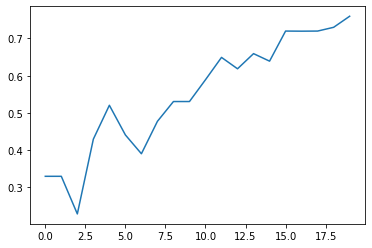

In [92]:
plt.plot(graph_data)

In [93]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.regularizers import l2
from sklearn.model_selection import KFold

Param: 0.100000, Accuracy: 0.470
Param: 0.010000, Accuracy: 0.470
Param: 0.001000, Accuracy: 0.600
Param: 0.000100, Accuracy: 0.380
Param: 0.000010, Accuracy: 0.350
Param: 0.000001, Accuracy: 0.730


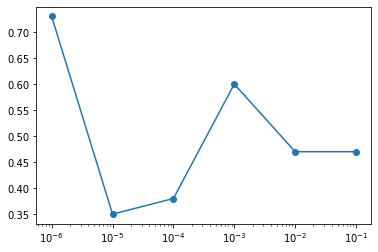

In [97]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_test = list()
for param in values:
	# define model
	model = Sequential()
	#Input layer
	model.add(Dense(12, input_dim=6, activation='relu', kernel_regularizer=l2(param)))
	#Hidden Layer
	model.add(Dense(10, activation='relu', kernel_regularizer=l2(param)))
	#Output layer
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(X_train, y_train, epochs=500, verbose=0)
	# evaluate the model
	_, test_acc = model.evaluate(X_test, y_test, verbose=0)
	print('Param: %f, Accuracy: %.3f' % (param, test_acc))
	all_test.append(test_acc)
# plot train and test means
plt.semilogx(values, all_test, label='test', marker='o')
plt.show()

In [107]:
def get_clf_model(hidden_layers, param):
  model = Sequential()
  model.add(Dense(12, input_dim=n_features, activation='relu', kernel_regularizer=l2(param)))
  for i in range(hidden_layers):
    model.add(Dense(10, activation='relu', kernel_regularizer=l2(param)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [111]:
graph_data = {}
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
kf = KFold(n_splits=3, shuffle = True)
for i in range(20):
  param_test = list()
  for param in values:
    #Make model
    model = get_clf_model(i+1,param)
    acc = 0
    kf = KFold(n_splits=3, shuffle = True)
    for train_index, test_index in kf.split(X):
      # Training phase
      X_train = X[train_index, :]
      y_train = y[train_index]
      # fit model
      model.fit(X_train, y_train, epochs=500, verbose=0)
      # Test phase
      X_test = X[test_index, :]
      y_test = y[test_index]    
      # evaluate the model
      _, test_acc = model.evaluate(X_test, y_test, verbose=0)
      acc+= test_acc
    score = acc/3
    print('Layer: %f, Param: %f, Accuracy: %.3f' % (i+1, param, score))
    param_test.append(score)
  graph_data[i+1] = param_test

Layer: 1.000000, Param: 0.100000, Accuracy: 0.333
Layer: 1.000000, Param: 0.010000, Accuracy: 0.380
Layer: 1.000000, Param: 0.001000, Accuracy: 0.433
Layer: 1.000000, Param: 0.000100, Accuracy: 0.400
Layer: 1.000000, Param: 0.000010, Accuracy: 0.333
Layer: 1.000000, Param: 0.000001, Accuracy: 0.500
Layer: 2.000000, Param: 0.100000, Accuracy: 0.480
Layer: 2.000000, Param: 0.010000, Accuracy: 0.340
Layer: 2.000000, Param: 0.001000, Accuracy: 0.433
Layer: 2.000000, Param: 0.000100, Accuracy: 0.413
Layer: 2.000000, Param: 0.000010, Accuracy: 0.333
Layer: 2.000000, Param: 0.000001, Accuracy: 0.413
Layer: 3.000000, Param: 0.100000, Accuracy: 0.333
Layer: 3.000000, Param: 0.010000, Accuracy: 0.387
Layer: 3.000000, Param: 0.001000, Accuracy: 0.413
Layer: 3.000000, Param: 0.000100, Accuracy: 0.333
Layer: 3.000000, Param: 0.000010, Accuracy: 0.333
Layer: 3.000000, Param: 0.000001, Accuracy: 0.347
Layer: 4.000000, Param: 0.100000, Accuracy: 0.400
Layer: 4.000000, Param: 0.010000, Accuracy: 0.373


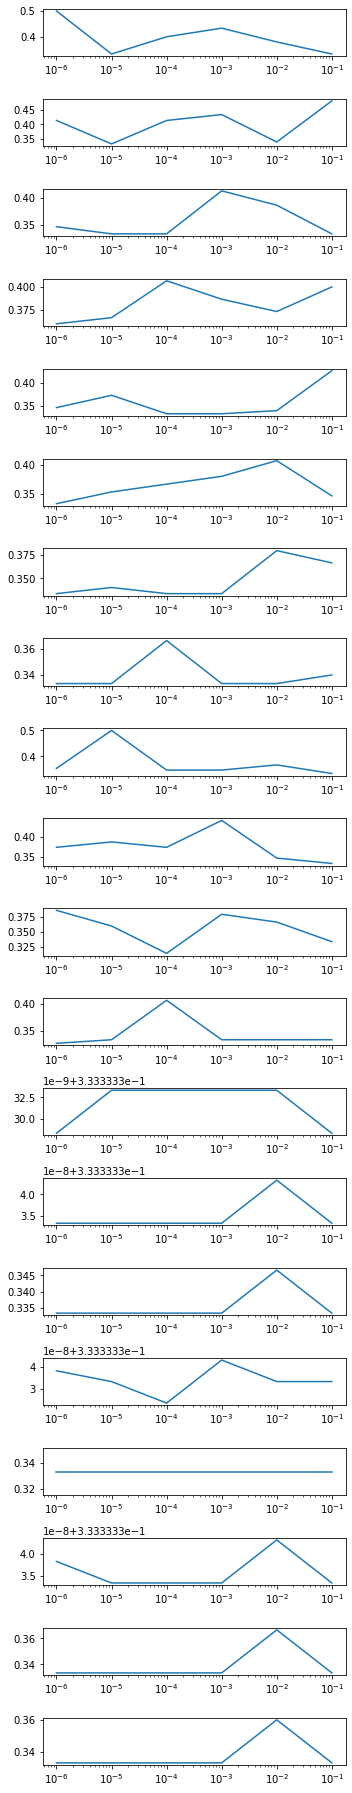

In [126]:
fig = plt.figure(figsize=(5,25)) 
for key in graph_data:
  plt.subplot(20,1,key)
  plt.semilogx(values, graph_data[key])
plt.tight_layout()